In [1]:
#Data handling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#Model evaluation (regression metrics)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split


#deplyoment
import joblib


In [2]:
# Load data
df = pd.read_csv("laptop.csv")
df.sample()


,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
287,287,HP Pavilion 15-eh3039AU Laptop ( AMD Ryzen 5 7...,"₹58,500",61.0,7th Gen AMD Ryzen 5 7530U,"Hexa Core, 12 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty


In [3]:
#droping unnecessary column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()


,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹50,399",70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,"₹26,989",55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,"₹69,990",60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty


In [5]:
df.tail()


,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,"₹64,990",68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty
916,Asus TUF Gaming A15 2023 FA577XV-HQ036WS Gamin...,"₹1,54,990",NaN,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR5 RAM,1 TB SSD,"15.6 inches, 2560 x 1440 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,"₹69,990",62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,"₹54,900",63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
919,MSI Bravo 15 B5ED-034IN Gaming Laptop (AMD Ryz...,"₹59,990",66.0,5th Gen AMD Ryzen 7 5800H,"Octa Core, 16 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",4 GB AMD Radeon RX6500M,Windows 11 OS,1 Year Warranty


In [6]:
#verifying after renaming
df.columns


Index(['Model', 'Price', 'Rating', 'Generation', 'Core', 'Ram', 'SSD',
       'Display', 'Graphics', 'OS', 'Warranty'],
      dtype='object')

In [7]:
#datatypes of each column
df.dtypes

Model          object
Price          object
Rating        float64
Generation     object
Core           object
Ram            object
SSD            object
Display        object
Graphics       object
OS             object
Warranty       object
dtype: object

In [8]:
# checking rows and column of data
df.shape

(920, 11)

In [9]:
# checks for any duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [10]:
#checks for null values in the dataset
df.isnull().sum()

Model           0
Price           0
Rating        152
Generation      0
Core            0
Ram             0
SSD             0
Display         1
Graphics        0
OS              1
Warranty        5
dtype: int64

In [11]:
#filling of null value in dataset
df['OS'] = df['OS'].fillna("Unknown")
df['Display'] = df['Display'].fillna("Unknown")
df['Warranty'] = df['Warranty'].fillna("Unknown")

In [12]:
#filling of missing values with mean
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [13]:
#Making new colume for price
df['price_float'] = df['Price'].str.replace('[₹,]', '', regex=True).astype('float64')


In [14]:
#Converting price from RUPEES to SGD
df['sgd_price'] = df['price_float'] * 0.016

#Rounding it nicely
df['sgd_price'] = df['sgd_price'].round(2)

In [15]:
#Scaled SGD price
# MinMaxScaler is a scaling method that scales the data to a fixed range, usually between 0 and 1. It transforms the data by subtracting the minimum value and dividing by the range (max - min).
price_scaler = MinMaxScaler()
price_scaler.fit(df[['sgd_price']]) 

# Save the scaler to a file
joblib.dump(price_scaler, 'scaler.pkl')

# Test if it's correct
print("Example:", price_scaler.inverse_transform([[0.18]]))  

Example: [[1832.9312]]


In [16]:
df.head(32)

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,price_float,sgd_price
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹50,399",70.00000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,50399.0,806.38
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",56.00000,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,23990.0,383.84
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,"₹26,989",55.00000,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,26989.0,431.82
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,"₹69,990",60.00000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,69990.0,1119.84
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",78.00000,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,102990.0,1647.84
5,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,"₹35,990",55.00000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,35990.0,575.84
6,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,"₹79,990",61.75651,Apple M1,Octa Core (4P + 4E),8 GB DDR4 RAM,256 GB SSD,"13.3 inches, 2560 x 1600 pixels",Apple M1 Integrated Graphics,Mac OS,1 Year Warranty,79990.0,1279.84
7,Samsung Galaxy Book2 NP550XED-KA1IN 15 Laptop ...,"₹42,990",54.00000,12th Gen Intel Core i5 1235U,"10 Cores (2P + 8E), 12 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Integrated UHD,Windows 11 OS,1 Year Warranty,42990.0,687.84
8,HP 15s-fq5330TU Laptop (12th Gen Core i5/ 16GB...,"₹54,990",56.00000,12th Gen Intel Core i5 1235U,"10 Cores (2P + 8E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Integrated Iris Xe,Windows 11 OS,1 Year Warranty,54990.0,879.84
9,HP Victus 15-fb1017AX Gaming Laptop (AMD Ryzen...,"₹56,490",69.00000,7th Gen Amd Ryzen 5 7535HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty,56490.0,903.84


In [17]:
#Making new column for Warranty in int format
df['warranty_int'] = df['Warranty'].str.extract('(\d+)', expand=False).fillna(0).astype('int64')

print(df[['Warranty', 'warranty_int']].head())

          Warranty  warranty_int
0  1 Year Warranty             1
1  1 Year Warranty             1
2  1 Year Warranty             1
3  1 Year Warranty             1
4  1 Year Warranty             1


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\junji\AppData\Local\Temp\ipykernel_6508\3331466637.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['warranty_int'] = df['Warranty'].str.extract('(\d+)', expand=False).fillna(0).astype('int64')


In [18]:

print('All unique values in Price')

print()
print(df['Price'].unique())
print('-'*40)
print()
print('#'*40)
print('Total unique values / Total number of records')
print('#'*40)
print(f'''{df['Price'].nunique()}/{df['Price'].shape[0]}''')

All unique values in Price

['₹50,399' '₹23,990' '₹26,989' '₹69,990' '₹1,02,990' '₹35,990' '₹79,990'
 '₹42,990' '₹54,990' '₹56,490' '₹24,990' '₹32,990' '₹52,990' '₹81,990'
 '₹1,14,900' '₹33,790' '₹26,749' '₹99,900' '₹75,990' '₹38,990' '₹49,990'
 '₹79,999' '₹1,32,490' '₹96,990' '₹55,490' '₹43,490' '₹44,990' '₹1,33,999'
 '₹47,990' '₹1,75,999' '₹96,999' '₹61,990' '₹34,990' '₹85,990' '₹84,990'
 '₹1,99,990' '₹33,600' '₹27,990' '₹79,899' '₹77,990' '₹59,990' '₹86,990'
 '₹19,979' '₹99,990' '₹1,12,990' '₹69,999' '₹72,990' '₹70,990' '₹67,990'
 '₹3,29,990' '₹1,46,990' '₹1,74,999' '₹55,390' '₹46,990' '₹1,35,999'
 '₹34,880' '₹1,38,990' '₹5,99,990' '₹53,490' '₹2,99,999' '₹65,690'
 '₹89,999' '₹3,99,900' '₹39,990' '₹84,700' '₹36,349' '₹43,990' '₹53,990'
 '₹48,990' '₹19,990' '₹89,990' '₹18,990' '₹36,890' '₹74,990' '₹57,990'
 '₹1,12,500' '₹68,990' '₹25,580' '₹37,990' '₹94,990' '₹46,490' '₹1,08,000'
 '₹46,890' '₹55,200' '₹31,990' '₹8,000' '₹1,62,990' '₹74,490' '₹65,990'
 '₹2,97,758' '₹1,39,990' '₹1,09,99

In [19]:

print('All unique values in Generation column')

print()
print(df['Generation'].unique())
print('-'*40)
print()
print('#'*40)
print('Total unique values / Total number of records')
print('#'*40)
print(f'''{df['Generation'].nunique()}/{df['Generation'].shape[0]}''')

All unique values in Generation column

['5th Gen AMD Ryzen 5 5600H' '11th Gen Intel Core i3 1115G4'
 '7th Gen AMD Ryzen 3 7320U' '12th Gen Intel Core i5 1240P'
 '14th Gen Intel Core i9 14900HX' '12th Gen Intel Core i3 1215U'
 'Apple M1' '12th Gen Intel Core i5 1235U' '7th Gen Amd Ryzen 5 7535HS'
 '11th Gen Intel Core i5 1135G7' '12th Gen Intel Core i5 12500H'
 '7th Gen AMD Ryzen 7 7840HS' 'Apple M3' '5th Gen AMD Ryzen 3 5300U'
 'Apple M2' 'Intel Core 5 Processor Series 1 120U'
 '11th Gen Intel Core i5 11400H ' '5th Gen AMD Ryzen 7 5800U'
 '13th Gen Intel Core i7 1355U' 'Intel Core 3 Processor 100U'
 'Intel Core Ultra 7 155U' 'Intel Core Ultra 7 Series 1 155H'
 'Intel Core Ultra 5 125U' '12th Gen Intel Core i5 12450H'
 'Intel Core 7 Processor Series 1 150U' '13th Gen Intel Core i5 13450HX'
 '6th Gen AMD Ryzen 9 6900HS\u200b' '7th Gen AMD Ryzen 3 7330U'
 '11th Gen Intel Core i7 11800H' '13th Gen Intel Core i5 13420H'
 '12th Gen Intel Core i7 12650H' '3rd Gen AMD Athlon 3050U'
 '12th Gen

In [20]:

print('All unique values in OS')

print()
print(df['OS'].unique())
print('-'*40)
print()
print('#'*40)
print('Total unique values / Total number of records')
print('#'*40)
print(f'''{df['OS'].nunique()}/{df['OS'].shape[0]}''')

All unique values in OS

['Windows 11 OS' 'Mac OS' 'Windows 10 OS' 'DOS OS' 'Windows 11 Pro OS'
 '2 Year Warranty' 'Backlit Keyboard'
 '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels'
 'Intel Iris Xe Graphics' '1 Year Warranty' 'Ubuntu OS' 'Windows 11  OS'
 'Chrome OS' 'Unknown' 'Windows OS' 'DOS 3.0 OS' 'Windows 10  OS']
----------------------------------------

########################################
Total unique values / Total number of records
########################################
17/920


In [21]:
#Deletion of corrupted data in OS column    
print("Original DataFrame - Row count:", len(df))

df = df[df['OS'] != 'Backlit Keyboard']
df = df[df['OS'] != '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels']
df = df[df['OS'] != '1 Year Warranty']
df = df[df['OS'] != '2 Year Warranty']
df = df[df['OS'] != 'Intel Iris Xe Graphics']

print("After deletion - Row count:", len(df))

Original DataFrame - Row count: 920
After deletion - Row count: 904


In [22]:

print('All unique values in Warranty')

print()
print(df['Warranty'].unique())
print('-'*40)
print()
print('#'*40)
print('Total unique values / Total number of records')
print('#'*40)
print(f'''{df['Warranty'].nunique()}/{df['Warranty'].shape[0]}''')

All unique values in Warranty

['1 Year Warranty' '2 Year Warranty' '3 Year Warranty' 'Backlit Keyboard'
 '1 USB 3.0 Ports' 'Unknown']
----------------------------------------

########################################
Total unique values / Total number of records
########################################
6/904


In [23]:
#Deletion of corrupted data in warranty column
print("Original DataFrame - Row count:", len(df))

df = df[df['Warranty'] != 'Backlit Keyboard']
df = df[df['Warranty'] != '1 USB 3.0 Ports']

print("After deletion - Row count:", len(df))

Original DataFrame - Row count: 904
After deletion - Row count: 897


In [24]:
import re

# Extract simplified brand + model (first 3-4 words, drop extras)
def simplify_model(text):
    # Remove anything in parentheses
    text = re.sub(r'\(.*?\)', '', str(text))
    
    # Remove noisy words like Gaming, Touch, Laptop, Notebook, etc.
    text = re.sub(r'(?i)\b(Gaming|Touch|Laptop|Notebook|Windows|Inches|cm|OS|Processor|with|Display)\b', '', text)
    
    # Keep only the first 3 or 4 words
    words = text.strip().split()
    return ' '.join(words[:4])

# creating a cleaner Model and Brand
df['Model'] = df['Model'].apply(simplify_model)
df['Brand'] = df['Model'].apply(lambda x: x.split()[0] if isinstance(x, str) else 'Unknown')

# Group infrequent brands into 'Others'
brand_counts = df['Brand'].value_counts()
rare_brands = brand_counts[brand_counts < 15].index
df['Brand'] = df['Brand'].replace(rare_brands, 'Others')

# check top brands
print("Top 10 Brands:\n", df['Brand'].value_counts())


Top 10 Brands:
 Brand
Lenovo     211
HP         175
Asus       132
Dell        95
MSI         91
Acer        70
Others      64
Samsung     21
Infinix     20
Apple       18
Name: count, dtype: int64


In [25]:


def group_generations(gen_str):
    gen_str = str(gen_str).lower()
    
    # Intel 12th/13th Gen
    if '12th gen intel' in gen_str or '13th gen intel' in gen_str:
        return "Intel 12th/13th Gen"
    
    # Intel 11th Gen & older
    if '11th gen intel' in gen_str or '10th gen intel' in gen_str:
        return "Intel 11th Gen & Below"
    
    # AMD Ryzen 7000 Series
    if '7th gen amd ryzen' in gen_str:
        return "AMD Ryzen 7000 Series"
    
    # AMD Ryzen 5000 Series
    if '5th gen amd ryzen' in gen_str:
        return "AMD Ryzen 5000 Series"
    
    # Intel Core Ultra
    if 'intel core ultra' in gen_str:
        return "Intel Core Ultra"
    
    # Apple Silicon
    if 'apple m' in gen_str:
        return "Apple Silicon"
    
    return "Others"

# Apply to DataFrame
df['Generation'] = df['Generation'].apply(group_generations)

In [26]:
def group_cores(core_str):
    core_str = str(core_str)
    
    # Extract total core count
    core_match = re.search(r'(\d+)\s*Cores?|(Dual|Quad|Hexa|Octa)\s*Core', core_str, re.IGNORECASE)
    if not core_match:
        return "Others"
    
    # Convert textual cores to numbers
    textual_map = {"dual":2, "quad":4, "hexa":6, "octa":8}
    if core_match.group(1):
        total_cores = int(core_match.group(1))
    else:
        total_cores = textual_map[core_match.group(2).lower()]

    # Grouping logic
    if total_cores == 2 or total_cores == 4:
        return f"{total_cores}-Core Entry"
    
    if total_cores == 6:
        return "6-Core Mainstream"
    
    if total_cores == 8:
        if re.search(r'4P\s*\+\s*4E', core_str):
            return "8-Core Hybrid (4P+4E)"
        return "8-Core Performance"
    
    if total_cores == 10:
        return "10-Core High-Perf"
    
    if total_cores == 12 or total_cores == 14:
        return "12-14 Core Power"
    
    if total_cores >= 16:
        return "16+ Core Extreme"
    
    return "Others"

# Apply to DataFrame
df['Core'] = df['Core'].apply(group_cores)
df['Core'].value_counts()

Core
10-Core High-Perf        173
6-Core Mainstream        159
12-14 Core Power         148
8-Core Performance        97
4-Core Entry              95
8-Core Hybrid (4P+4E)     77
2-Core Entry              70
16+ Core Extreme          65
Others                    13
Name: count, dtype: int64

In [27]:
def normalize_ram(ram_str):
    text = str(ram_str).upper()

    # Find RAM size (e.g., '8', '16', etc.)
    size = re.findall(r'\d+', text)
    if not size:
        return 'Others'
    
    # Detect RAM type
    if 'DDR5' in text:
        ram_type = 'DDR5'
    elif 'LPDDR5' in text:
        ram_type = 'LPDDR5'
    elif 'LPDDR4' in text:
        ram_type = 'LPDDR4'
    elif 'DDR4' in text:
        ram_type = 'DDR4'
    elif 'RAM' in text:
        ram_type = ''  # fallback if just "RAM"
    else:
        return 'Others'
    
    return f"{size[0]} GB {ram_type} RAM" if ram_type else f"{size[0]} GB RAM"

df['Ram'] = df['Ram'].apply(normalize_ram)

# Replace rare types with 'Others'
rare_rams = df['Ram'].value_counts()[df['Ram'].value_counts() < 15].index
df['Ram'] = df['Ram'].replace(rare_rams, 'Others')

df['Ram'].value_counts()


Ram
16 GB DDR5 RAM      245
16 GB DDR4 RAM      221
8 GB DDR4 RAM       203
8 GB DDR5 RAM        73
32 GB DDR5 RAM       58
Others               49
16 GB LPDDR4 RAM     29
8 GB LPDDR4 RAM      19
Name: count, dtype: int64

In [28]:
ssd_count = df['SSD'].value_counts()
rare_ssd = ssd_count[ssd_count <= 15].index
df['SSD'] = df['SSD'].replace(rare_ssd, 'Others')
df['SSD'] = df['SSD'].replace("512 GB SSD", "512 GB")
df['SSD'] = df['SSD'].replace("1 TB SSD", "1 TB")
df['SSD'] = df['SSD'].replace("256 GB SSD", "256 GB")
df['SSD'] = df['SSD'].replace("2 TB SSD", "2 TB")
df['SSD'].value_counts()

SSD
512 GB SSD    611
1 TB SSD      215
256 GB SSD     36
Others         18
2 TB SSD       17
Name: count, dtype: int64

In [29]:
def broad_graphics_category(name):
    name = str(name).lower()
    # Intel Iris Xe group
    if re.search(r'iris[\s\-]*x[eé]?', name):
        return "Intel Iris Xe"
    # Intel UHD group
    if re.search(r'uhd', name):
        return "Intel UHD"
    # Intel Integrated only (but not Iris or UHD)
    if 'integrated' in name and not ('iris' in name or 'uhd' in name):
        return "Intel Integrated"
    # Intel HD
    if 'hd graphics' in name or 'intel hd' in name:
        return "Intel HD"
    # AMD Radeon group
    if 'radeon' in name:
        return "AMD Radeon"
    # NVIDIA GeForce RTX group
    if 'rtx' in name:
        return "NVIDIA GeForce RTX"
    # NVIDIA GeForce GTX group
    if 'gtx' in name:
        return "NVIDIA GeForce GTX"
    # NVIDIA Quadro group
    if 'quadro' in name:
        return "NVIDIA Quadro"
    # Apple GPU
    if 'apple' in name or 'm1' in name:
        return "Apple GPU"
    # ARM Mali
    if 'mali' in name:
        return "ARM Mali"
    # Otherwise, keep as is or "Others"
    return "Others"

# 1. Apply broad grouping
df['Graphics'] = df['Graphics'].apply(broad_graphics_category)

# 2. Calculate counts per broad group
counts = df['Graphics'].value_counts()

# 3. Identify groups with <= 15 occurrences
rare_groups = counts[counts <= 15].index

# 4. Replace those rare groups with "Others"
df['Graphics'] = df['Graphics'].apply(lambda x: 'Others' if x in rare_groups else x)

# 5. Optional: See result
print(df['Graphics'].value_counts())

Graphics
NVIDIA GeForce RTX    298
Intel Iris Xe         192
Intel UHD             171
AMD Radeon            112
Others                 66
Intel Integrated       38
NVIDIA GeForce GTX     20
Name: count, dtype: int64


In [30]:
def extract_display_size(text):
    # Lowercase, remove leading/trailing spaces
    text = str(text).strip().lower()
    # Regex to capture 'number(.number) inches' at the start
    match = re.match(r'(\d+(\.\d+)?)\s*[\u2009 ]*inches', text)
    if match:
        return match.group(1) + ' inches'
    return 'Unknown'

# 1. Apply the size extraction
df['Display'] = df['Display'].apply(extract_display_size)

# 2. Group rare sizes (≤15) into 'Others'
size_counts = df['Display'].value_counts()
rare_sizes = size_counts[size_counts <= 15].index
df['Display'] = df['Display'].apply(lambda x: 'Others' if x in rare_sizes else x)

# 3. View value counts:
print(df['Display'].value_counts())

Display
15.6 inches    436
14 inches      208
16 inches      128
Others          58
16.1 inches     25
13.3 inches     22
17.3 inches     20
Name: count, dtype: int64


In [31]:
df['OS'] = df['OS'].replace('15.6 inches, 1920 x 1080 pixels', 'Windows 11')
df['OS'] = df['OS'].replace('Windows OS', 'Windows 11')
df['OS'] = df['OS'].replace('Backlit Keyboard', 'Windows 11')
df['OS'] = df['OS'].replace('Ubuntu OS', 'Windows 10')
df['OS'] = df['OS'].replace('Intel Iris Xe Graphics', 'Windows 11')
# In OS 1 Year warranty values drop 
df = df[df['OS'] != '1 Year Warranty']
# if OS less than 15 or equal than 15 counts declear "Others"
os_counts =  df['OS'].value_counts()
replace_os = os_counts[os_counts <= 15].index
df['OS'] = df['OS'].replace(replace_os, 'Others')
df['OS'].value_counts()

OS
Windows 11 OS    830
Others            49
Mac OS            18
Name: count, dtype: int64

In [32]:
# In warranty columns Windows 11 OS values replace with 1 Year Warranty
df['Warranty'] = df['Warranty'].replace('Windows 11 OS', '1 Year Warranty')
df['Warranty'] = df['Warranty'].replace('1 USB 3.0 Ports', '1 Year Warranty')
df['Warranty'] = df['Warranty'].replace('2 USB 3.0 Ports', '1 Year Warranty')
df['Warranty'] = df['Warranty'].replace('Ports: 1 HDMI', '1 Year Warranty')
df['Warranty'].value_counts()

Warranty
1 Year Warranty    806
2 Year Warranty     74
3 Year Warranty     16
Unknown              1
Name: count, dtype: int64

In [33]:
df.head()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,price_float,sgd_price,warranty_int,Brand
0,HP Victus 15-fb0157AX,"₹50,399",70.0,AMD Ryzen 5000 Series,6-Core Mainstream,8 GB DDR4 RAM,512 GB SSD,15.6 inches,AMD Radeon,Windows 11 OS,1 Year Warranty,50399.0,806.38,1,HP
1,Tecno Megabook T1,"₹23,990",56.0,Intel 11th Gen & Below,2-Core Entry,8 GB LPDDR4 RAM,512 GB SSD,15.6 inches,Intel UHD,Windows 11 OS,1 Year Warranty,23990.0,383.84,1,Others
2,Lenovo V15 G4 ‎82YU00W7IN,"₹26,989",55.0,AMD Ryzen 7000 Series,4-Core Entry,8 GB DDR5 RAM,512 GB SSD,15.6 inches,AMD Radeon,Windows 11 OS,1 Year Warranty,26989.0,431.82,1,Lenovo
3,Samsung Galaxy Book2 Pro,"₹69,990",60.0,Intel 12th/13th Gen,12-14 Core Power,16 GB DDR5 RAM,512 GB SSD,13.3 inches,Intel Iris Xe,Windows 11 OS,1 Year Warranty,69990.0,1119.84,1,Samsung
4,Xiaomi Redmi G Pro,"₹1,02,990",78.0,Others,16+ Core Extreme,16 GB DDR5 RAM,1 TB SSD,16.1 inches,NVIDIA GeForce RTX,Windows 11 OS,1 Year Warranty,102990.0,1647.84,1,Others


In [34]:
df.sample()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,price_float,sgd_price,warranty_int,Brand
754,Dell Inspiron 7430 2,"₹58,490",52.0,Intel 12th/13th Gen,6-Core Mainstream,8 GB DDR5 RAM,1 TB SSD,14 inches,Intel UHD,Windows 11 OS,1 Year Warranty,58490.0,935.84,1,Dell


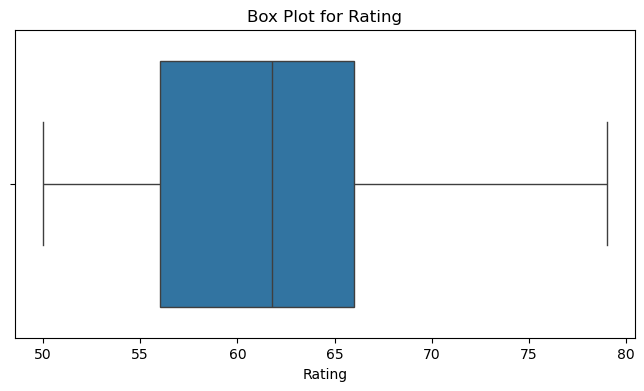

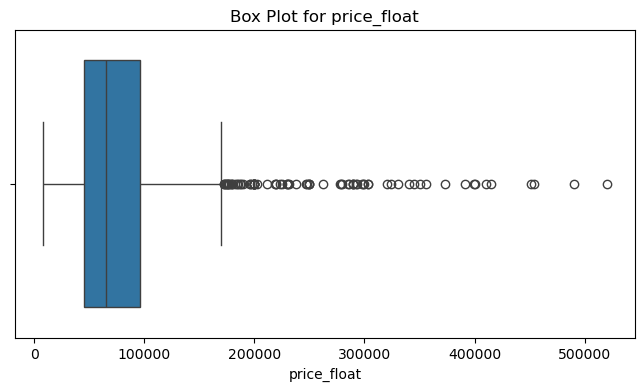

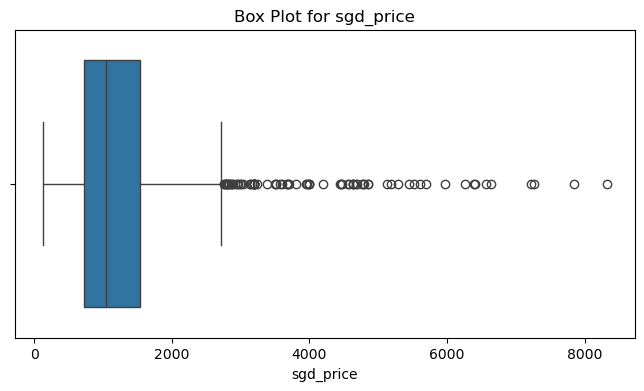

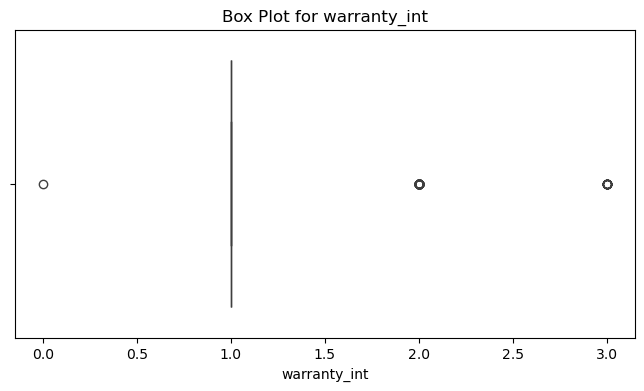

In [35]:
#checks for any outliers    
def show_plots(df):
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            plt.figure(figsize=(8,4))
            sns.boxplot(data=df, x=df[col])
            plt.title(f'Box Plot for {col}')
            plt.show()         
show_plots(df)

Ram
32 GB DDR5 RAM      3665.212241
Others              2014.854898
16 GB DDR5 RAM      1696.581469
16 GB DDR4 RAM      1069.585611
16 GB LPDDR4 RAM     993.615172
8 GB DDR5 RAM        843.878219
8 GB DDR4 RAM        712.743498
8 GB LPDDR4 RAM      650.888421
Name: sgd_price, dtype: float64


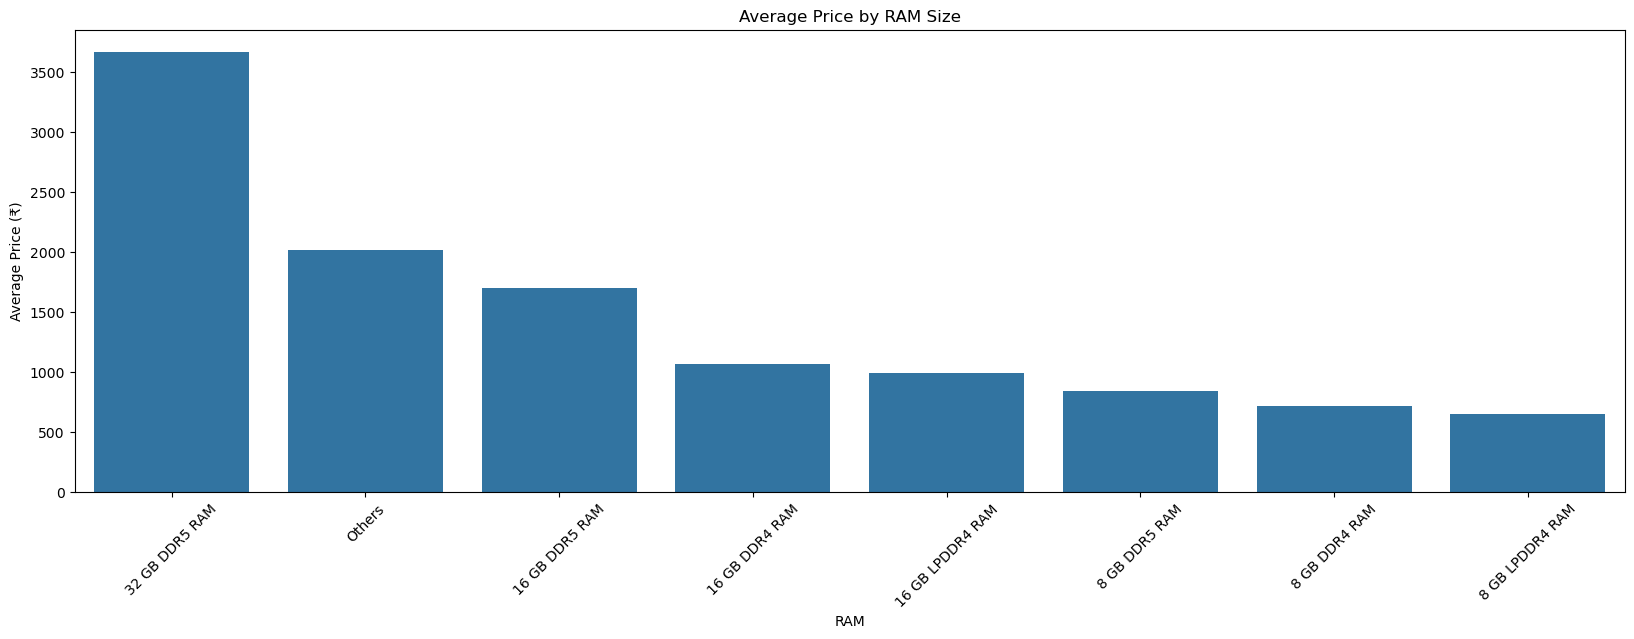

In [36]:
avg_price_by_ram = df.groupby('Ram')['sgd_price'].mean().sort_values(ascending=False)
print(avg_price_by_ram)

# Bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=avg_price_by_ram.index, y=avg_price_by_ram.values)
plt.title('Average Price by RAM Size')
plt.xlabel('RAM')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.show()

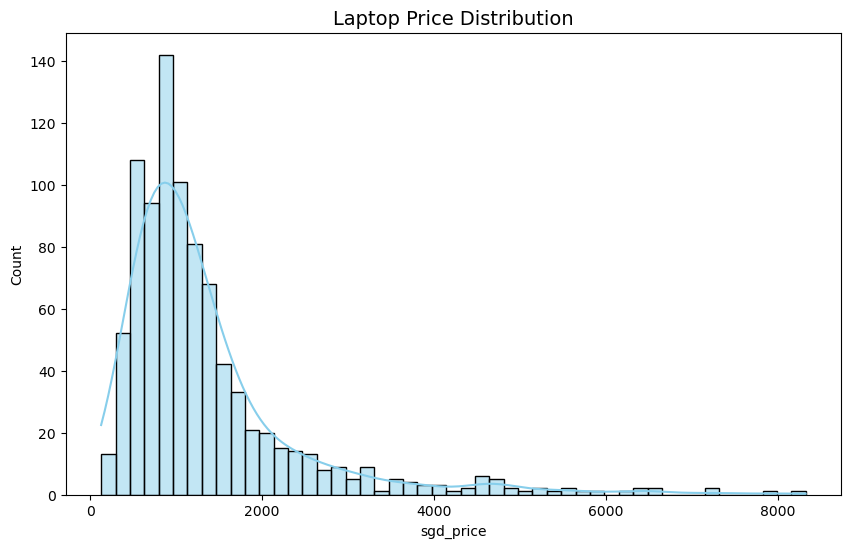

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sgd_price'], kde=True, color='skyblue')
plt.title('Laptop Price Distribution', fontsize=14)
plt.xlabel('sgd_price')
plt.show()

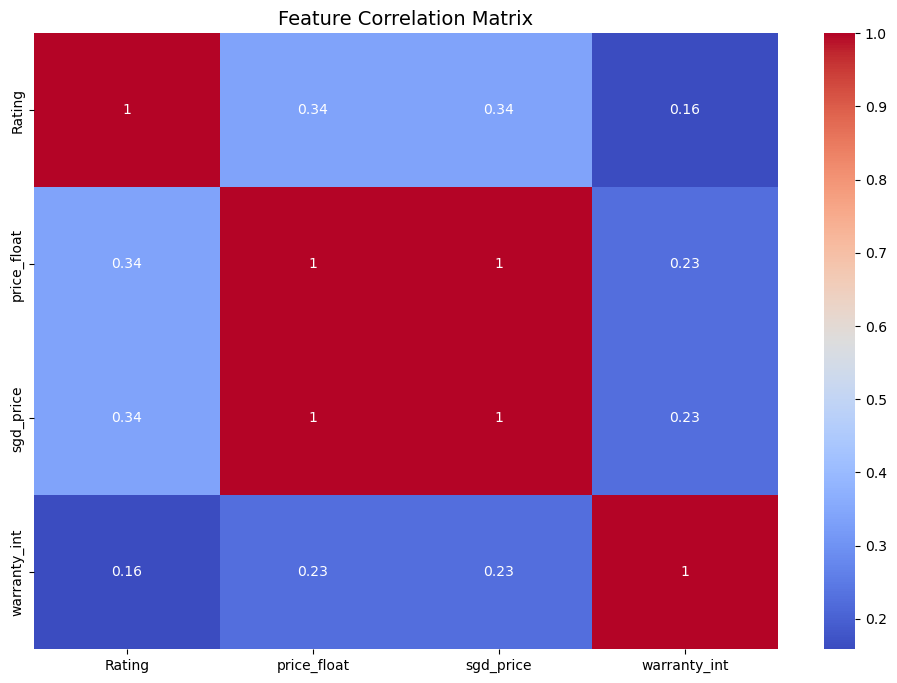

In [38]:
# Selected numerical features
num_features = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

C:\Users\junji\AppData\Local\Temp\ipykernel_6508\181991187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='sgd_price', data=df, palette='viridis')


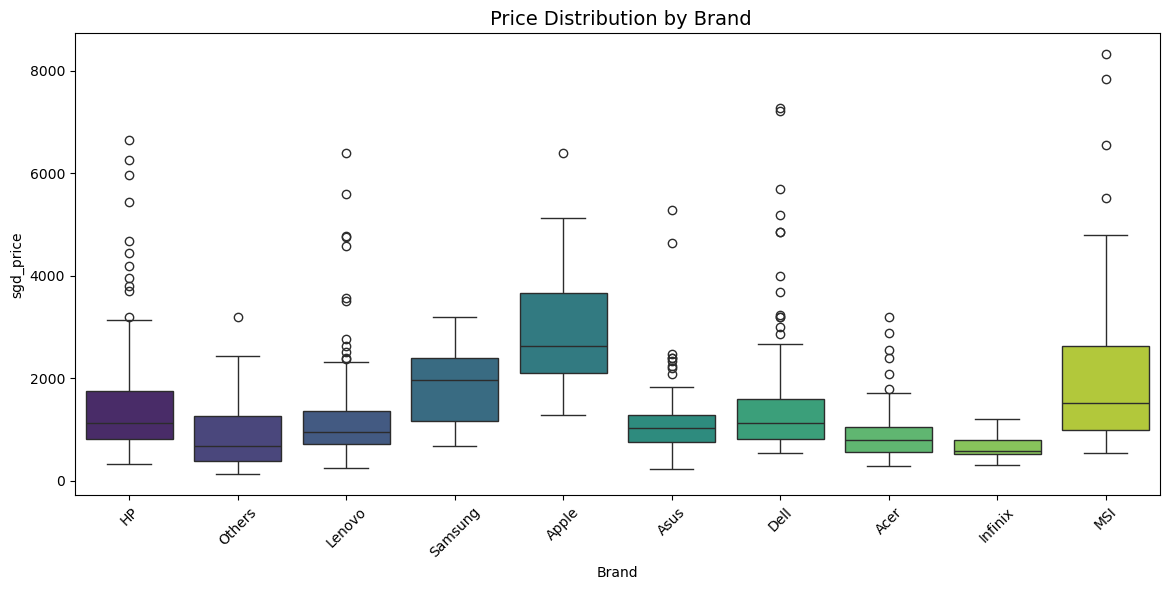

In [39]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Brand', y='sgd_price', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title(' Price Distribution by Brand', fontsize=14)
plt.show()

In [40]:
label_encoder = LabelEncoder()
df['Generation'] = label_encoder.fit_transform(df['Generation'])
df['Core'] = label_encoder.fit_transform(df['Core'])
df['Ram'] = label_encoder.fit_transform(df['Ram'])
df['SSD'] = label_encoder.fit_transform(df['SSD'])
df['Display'] = label_encoder.fit_transform(df['Display'])
df['Graphics'] = label_encoder.fit_transform(df['Graphics'])
df['OS'] = label_encoder.fit_transform(df['OS'])
df['Brand'] = label_encoder.fit_transform(df['Brand'])

sc = StandardScaler()
min_max_scaler = MinMaxScaler()
price_scaler = MinMaxScaler()
df['sgd_price'] = price_scaler.fit_transform(df[['sgd_price']])

rating_scaler = MinMaxScaler()
df['Rating_scaled'] = rating_scaler.fit_transform(df[['Rating']])
df.head(5)


,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,price_float,sgd_price,warranty_int,Brand,Rating_scaled
0,HP Victus 15-fb0157AX,"₹50,399",70.0,0,5,4,3,2,0,2,1 Year Warranty,50399.0,0.082812,1,4,0.689655
1,Tecno Megabook T1,"₹23,990",56.0,3,3,6,3,2,3,2,1 Year Warranty,23990.0,0.031231,1,8,0.206897
2,Lenovo V15 G4 ‎82YU00W7IN,"₹26,989",55.0,1,4,5,3,2,0,2,1 Year Warranty,26989.0,0.037088,1,6,0.172414
3,Samsung Galaxy Book2 Pro,"₹69,990",60.0,4,1,1,3,0,2,2,1 Year Warranty,69990.0,0.121077,1,9,0.344828
4,Xiaomi Redmi G Pro,"₹1,02,990",78.0,6,2,1,0,4,5,2,1 Year Warranty,102990.0,0.185531,1,8,0.965517


In [41]:
X = df[['Rating_scaled', 'Generation', 'Core', 'Ram', 'SSD', 'Display', 'Graphics', 'OS', 'warranty_int']]
y = df['sgd_price'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [5],
    'max_features': [None]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch to find best params
grid_search.fit(X_train, y_train)

# Use best estimator to predict
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Decision Tree Regressor performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuned Decision Tree Regressor performance:
RMSE: 0.08
R2: 0.6766


In [42]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_result.head(10))

     Actual  Predicted
0  0.053712   0.033184
1  0.085920   0.093814
2  0.154671   0.127838
3  0.322252   0.248687
4  0.050001   0.046716
5  0.095685   0.071019
6  0.187484   0.149501
7  1.000000   0.467615
8  0.219711   0.165068
9  0.035137   0.035640


In [43]:


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2: {r2_rf:.4f}")

Random Forest performance:
RMSE: 0.07
R2: 0.7467


In [44]:
df_result_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(df_result_rf.head(10))

     Actual  Predicted
0  0.053712   0.034928
1  0.085920   0.105276
2  0.154671   0.203820
3  0.322252   0.280896
4  0.050001   0.066605
5  0.095685   0.074114
6  0.187484   0.150513
7  1.000000   0.437095
8  0.219711   0.143865
9  0.035137   0.032635


In [45]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)


mse_gb = mean_squared_error(y_test, y_pred)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred)

print(f"Gradient Boosting performance:")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R2: {r2_gb:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Gradient Boosting performance:
RMSE: 0.07
R2: 0.7879


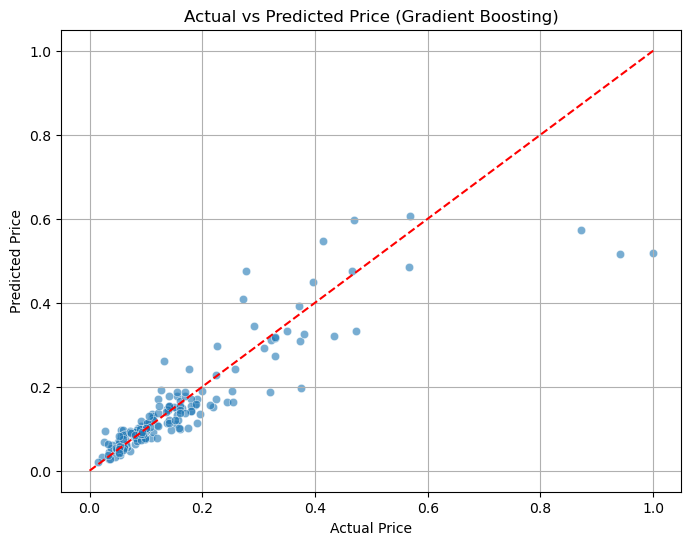

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

df_result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=df_result, alpha=0.6)

max_val = max(df_result['Actual'].max(), df_result['Predicted'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.title('Actual vs Predicted Price (Gradient Boosting)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


In [47]:
df.head()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,price_float,sgd_price,warranty_int,Brand,Rating_scaled
0,HP Victus 15-fb0157AX,"₹50,399",70.0,0,5,4,3,2,0,2,1 Year Warranty,50399.0,0.082812,1,4,0.689655
1,Tecno Megabook T1,"₹23,990",56.0,3,3,6,3,2,3,2,1 Year Warranty,23990.0,0.031231,1,8,0.206897
2,Lenovo V15 G4 ‎82YU00W7IN,"₹26,989",55.0,1,4,5,3,2,0,2,1 Year Warranty,26989.0,0.037088,1,6,0.172414
3,Samsung Galaxy Book2 Pro,"₹69,990",60.0,4,1,1,3,0,2,2,1 Year Warranty,69990.0,0.121077,1,9,0.344828
4,Xiaomi Redmi G Pro,"₹1,02,990",78.0,6,2,1,0,4,5,2,1 Year Warranty,102990.0,0.185531,1,8,0.965517


In [48]:
joblib.dump(best_gb, 'model.pkl')

['model.pkl']